# SLU08 - Metrics for regression: Learning Notebook

In this notebook, you will learn about:

    - Loss functions vs. Evaluation Metrics
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
    - Coefficient of Determination (R²)
    - Adjusted R²
    - Scikitlearn metrics
    - Using metrics

## 1 - Loss functions vs. Evaluation metrics

A big part of data science is translating customer business problems into machine learning problems. An important step in this process is defining the **key performance indicators (KPIs)**. These are basically measures of success. To obtain maximum success your model should optimise towards these KPIs. Unfortunately, this is not always possible. 

As you know, the learning process during model training requires a differentiable loss function, and you have no guarantees that the KPI you defined with your customer will be differentiable. This means you need a proxy metric that approximates the true KPI but is differentiable. 

In common literature the KPI is actually called the evaluation metric, and the proxy metric you use to train the model is the loss function. Many times these are actually the same, but you should be aware that they mean different things. So, don't forget:

* **Loss function** is what your model will minimize;
* **Evaluation metric** is what you will use to evaluate how good your model is.

Normally the workflow is that you are given or you collaboratively define an evaluation metric. If this metric is differentiable, then you should most probably use it as your loss function. If it isn't, you should find an adequate proxy loss function.

Next we'll cover several metrics for regression problems that can be used both as evaluation metrics.

## 2 - Metrics for regression

Before getting deeper into the performance metrics, it is best to clarify the definition of error, despite its intuitive concept.

When we predict a continuous variable, a common-sense definition of error is simple: we want the model predictions to be as close to actual as possible.

So, in terms of model performance, **error** refers to the difference between the observed target value and the predicted value. The lower the difference between the observed outcome ‘y’ and the predicted outcome ‘ŷ’, the better the performance of the model. A higher difference means a worse performance of the model.

Now that this is clear, let's take a look at some of the metrics we can use to measure the performance of regression models! 

### 2.1 - Mean Absolute Error (MAE)

$$MAE = \frac{1}{N} \sum_{n=1}^N \left|y_n - \hat{y}_n\right|$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [1]:
mae = lambda y, y_hat: np.abs(y - y_hat).mean()

* Corresponds to the average of the absolute difference between predicted values and observed values.
* All the individual differences are weighted equally in the average, therefore it does not penalise larger errors more than smaller ones.
* Can only assume non-negative values.
* It's more robust to outliers.
* It's more interpretable than the MSE (Mean Squared Error - see next section) since its values are on the same units as the target.
* The output can be interpreted as the expected error measured in the same units as the target. So, if you're predicting a price, the labels have the unit \\$ and the evaluation metric has the same unit (\\$).

### 2.2 - Mean Squared Error (MSE)

$$MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [2]:
mse = lambda y, y_hat: ((y - y_hat)**2).mean()

* Measures the average of the errors squared. It basically calculates the difference between the estimated and the actual value, squares these results and then computes their average.
* Can only assume non-negative values.
* It is more sensitive to outliers.
* Loses interpretability due to the squaring. So, if you're predicting a price, the labels have the unit \\$ but the evaluation metric has the unit \\$².

### 2.3 - Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{MSE}$$

In [3]:
rmse = lambda y, y_hat: np.sqrt(mse(y, y_hat))

* Calculates the average of the squared errors across all samples but, in addition, takes the square root of the result, effectively taking the square root of MSE.
* Can only assume non-negative values.
* It is more sensitive to outliers.
* It's more interpretable than the MSE since its values are on the same units as the target, so it is normally prefered to the MSE.
* So, if you're predicting a price, the labels have the unit \\$ and the evaluation metric has the same unit (\\$).

### 2.4 - Coefficient of Determination (R²)

$$\bar{y} = \frac{1}{N} \sum_{n=1}^N y_n$$

$$R² = 1 - \frac{MSE(y, \hat{y})}{MSE(y, \bar{y})} 
= 1 - \frac{\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2}{\frac{1}{N} \sum_{n=1}^N (y_n - \bar{y})^2}
= 1 - \frac{\sum_{n=1}^N (y_n - \hat{y}_n)^2}{\sum_{n=1}^N (y_n - \bar{y})^2}$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [4]:
r2 = lambda y, y_hat: 1 - (mse(y, y_hat) / mse(y, np.mean(y)))

* R² represents the proportion of the variance for the dependent variable y that’s explained by the independent variables X. For example, if you got a R² of 0.7, you can say that the set of features you used are able to explain 70% of the target variable.
* R² compares how much better your regression model is when compared with a predictor that outputs just the mean of the targets, which acts as a baseline. If the chosen model fits worse than that baseline model, the 𝑅² is negative. 
* Also, when using R², there are some important [caveats](https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats) to take into account. One of the caveats is that, depending on the model, the more features are added to a model, the more the R² increases when, in fact, those features are not intrinsically predictive.
* Another interpretation is that R² measures the linear correlation between the predictions and the target. 
* The R² has an upper bound of 1, depending on your application this may be an advantage. An R² = 0 or below means that your model doesn't explain anything in the target by using the features you have selected.


### 2.5 - Adjusted R²

$$R_{adj}^2 = 1 - \frac{N - 1}{N - K - 1} (1 - R^2)$$

where $N$ is the number of observations in the training dataset and K is the number of features your model is using.

In [5]:
adjusted_r2 = lambda y, y_hat, N, K: 1 - ((N - 1) / (N - K - 1)) * (1 - r2(y, y_hat))

* Just like R², adjusted R² also represents the proportion of the variance for the dependent variable y that’s explained by the independent variables X, but adjusts for the number of terms in a model. 
* So, in order to take into account the addition of non-intrinsically predictive variables, we can use the adjusted R² score.
* The more predictive features are added to the model, the higher the Adjusted R². However, the more non-intrinsically predictive features are added to the model, the lower the Adjusted R² value, differently from what would happen with R².
* The adjusted R² is always less or equal the R² value.

## 3 - Using the metrics

### 3.1 - Hold out method

As you learned in previous units, there are many ways of selecting your best estimator and most of it relies on some way of measuring an in-sample-error (ISE) - computed on data used for training - and an out-of-sample error (OSE) - computed on data not used for training. 

One of the methods you've seen is the hold-out method, where you can just split your data in a training set, where we will compute the ISE, and a test set, where we will compute the OSE.

Let's start by seeing how to use this method with different metrics. First, let's load some data. 

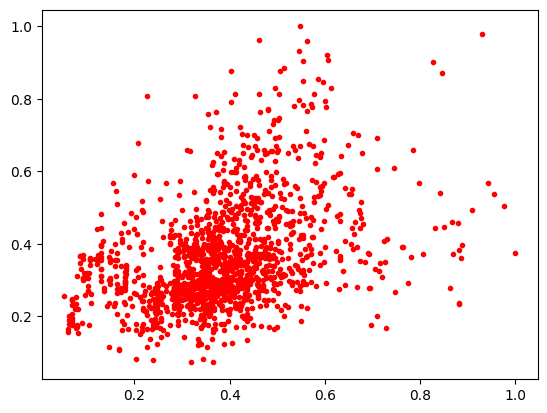

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/example_data.csv')
x = df['LotArea'].values
y = df['SalePrice'].values

plt.plot(x, y, 'r.')

Now, remember the sklearn function to get your split for the hold-out method:

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)
print("Number of observations:\nTrain: {} | Test: {}".format(x_train.shape[0], x_test.shape[0]))

Number of observations:
Train: 852 | Test: 569


We now want to train some models and get estimates on both the training data and the test data. Let's train three models:
* **Linear Regression**: You have learned about this model in SLU07. It is the closed form solution for optimising towards the RMSE.
* **SGDRegressor:** You have learned about this model in SLU07. It is an iterative solution for linear regression based on SGD. By default it optimises for the RMSE.
* **SGDRegressor_MAE:** This is a slight variation of the SGDRegressor where we change the loss to *epsilon insensitive* and the epsilon to 0. For now you only need to know that this is an approximation so that the SGD converges to the MAE instead of the RMSE.

In [8]:
from sklearn import linear_model

x_train_clf = x_train.reshape(-1, 1)
x_test_clf = x_test.reshape(-1, 1)

clf_1 = linear_model.LinearRegression()
clf_2 = linear_model.SGDRegressor(random_state=10)
clf_3 = linear_model.SGDRegressor(loss='epsilon_insensitive', epsilon=0, random_state=10)

clf_1.fit(x_train_clf, y_train)
clf_2.fit(x_train_clf, y_train)
clf_3.fit(x_train_clf, y_train)

y_hat_train_1 = clf_1.predict(x_train_clf)
y_hat_train_2 = clf_2.predict(x_train_clf)
y_hat_train_3 = clf_3.predict(x_train_clf)


y_hat_test_1 = clf_1.predict(x_test_clf)
y_hat_test_2 = clf_2.predict(x_test_clf)
y_hat_test_3 = clf_3.predict(x_test_clf)

Let's compare the metrics on both sets:

In [9]:
print("Mean Squared Error (MAE)")
print("LinearRegression (Train): {}".format(mae(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(mae(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(mae(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(mae(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(mae(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(mae(y_test, y_hat_test_3)))

print("\n========================\n")

print("Root Mean Squared Error (RMSE)")
print("LinearRegression (Train): {}".format(rmse(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(rmse(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(rmse(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(rmse(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(rmse(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(rmse(y_test, y_hat_test_3)))

print("\n========================\n")

print("R Squared (R2)")
print("LinearRegression (Train): {}".format(r2(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(r2(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(r2(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(r2(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(r2(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(r2(y_test, y_hat_test_3)))

Mean Squared Error (MAE)
LinearRegression (Train): 0.10458696001870452
SGDRegressor (Train): 0.10691756445904846
SGDRegressor_MAE (Train): 0.10201551648216647
LinearRegression (Test): 0.10231247228421318
SGDRegressor (Test): 0.10676318525512477
SGDRegressor_MAE (Test): 0.09976946697182527


Root Mean Squared Error (RMSE)
LinearRegression (Train): 0.13713041971628653
SGDRegressor (Train): 0.14084638029623728
SGDRegressor_MAE (Train): 0.1440540290850338
LinearRegression (Test): 0.1308432078624148
SGDRegressor (Test): 0.1369295525109932
SGDRegressor_MAE (Test): 0.13724366451104927


R Squared (R2)
LinearRegression (Train): 0.1454781963155536
SGDRegressor (Train): 0.09853904994075202
SGDRegressor_MAE (Train): 0.057011584851018426
LinearRegression (Test): 0.19233940791017634
SGDRegressor (Test): 0.11545301906486449
SGDRegressor_MAE (Test): 0.11139011953629918


As you may have expected, the model that obtains best test MAE is the SGDRegressor_MAE. This is in line with what we previously discussed, you should always use the loss function that best approximates your evaluation metric.

Regarding the RMSE and the R2 the best model is the linear regression.  But let's look at the actual predictions to get a better intuition:

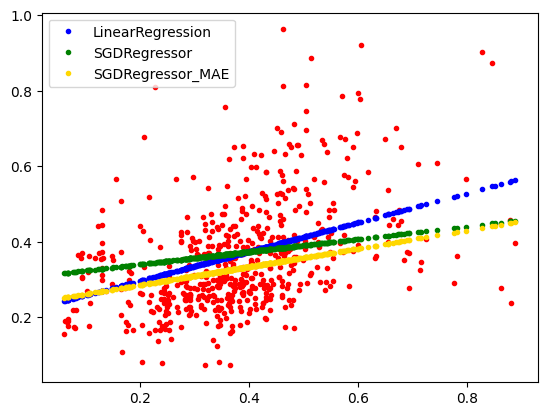

In [13]:
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, y_hat_test_1, '.', color='blue', label='LinearRegression')
plt.plot(x_test, y_hat_test_2, '.', color='green', label='SGDRegressor')
plt.plot(x_test, y_hat_test_3, '.', color='gold', label='SGDRegressor_MAE')
plt.legend()

It seems that the default SGDRegressor is highly impacted by the outliers on the left, this results in it obtaining a worse MAE than the SGDRegressor_MAE. It's also interesting to note that the linear regression has a stronger slope than the SGDRegressor_MAE, although they have a similar intercept. 

Also, don't forget that the SGD is an iterative based solution that has several parameters, this means that if we tuned the parameters in an extra validation set we may be able to squeeze extra performance. Also, this is just a toy example with one feature, perhaps due to the simplicity of the data it just so happens that linear regression works best.

Finally, to make a consistent analysis, you need to know if our metric should be minimised (like RMSE) or maximised (like R2). If you want to normalize this to make sure your implementation is able to pick a model you can simply impose that your metric should be maximised, for example, and just reverse metrics that don't fit this definition.

For example, we can turn RMSE into negative RMSE and apply the same behavior to other metrics that aim to be minimised. That way, we could write:

In [11]:
mae_mod = lambda y, y_hat: -mae(y, y_hat)
mse_mod = lambda y, y_hat: -mse(y, y_hat)
rmse_mod = lambda y, y_hat: -rmse(y, y_hat)

metrics = {
    'Negative MAE': mae_mod,
    'Negative RMSE': rmse_mod,
    'R2': r2
}

clfs = {
    'LinearRegressor': clf_1,
    'SGDRegressor': clf_2,
    'SGDRegressor_MAE': clf_3
}


for key, clf in clfs.items():
    clf.fit(x_train_clf, y_train)

lst = []
for metric, metric_f in metrics.items():
    
    best = None 
    best_model = None
    lst_lst = []
    print("{}".format(metric))
    for key, clf in clfs.items():
        y_hat_train = clf.predict(x_train_clf)
        y_hat_test = clf.predict(x_test_clf)

        train_score = metric_f(y_train, y_hat_train)
        test_score = metric_f(y_test, y_hat_test)
        print("{} (Train): {}".format(key, train_score))
        print("{} (Test): {}".format(key, test_score))
        if not best or test_score > best:
            best = test_score
            best_model = key
        lst_lst.append([train_score,test_score])
    lst.append(lst_lst)
    print("\nBest model with {}: {}".format(metric, best_model))
        
    print("\n========================\n")
    


Negative MAE
LinearRegressor (Train): -0.10458696001870452
LinearRegressor (Test): -0.10231247228421318
SGDRegressor (Train): -0.10691756445904846
SGDRegressor (Test): -0.10676318525512477
SGDRegressor_MAE (Train): -0.10201551648216647
SGDRegressor_MAE (Test): -0.09976946697182527

Best model with Negative MAE: SGDRegressor_MAE


Negative RMSE
LinearRegressor (Train): -0.13713041971628653
LinearRegressor (Test): -0.1308432078624148
SGDRegressor (Train): -0.14084638029623728
SGDRegressor (Test): -0.1369295525109932
SGDRegressor_MAE (Train): -0.1440540290850338
SGDRegressor_MAE (Test): -0.13724366451104927

Best model with Negative RMSE: LinearRegressor


R2
LinearRegressor (Train): 0.1454781963155536
LinearRegressor (Test): 0.19233940791017634
SGDRegressor (Train): 0.09853904994075202
SGDRegressor (Test): 0.11545301906486449
SGDRegressor_MAE (Train): 0.057011584851018426
SGDRegressor_MAE (Test): 0.11139011953629918

Best model with R2: LinearRegressor




As you see, it is quite useful for all metrics to have the same logic in terms of performance, this is, how you should interpret if the model is better or not.

### 3.2 - Choosing the right metric

Besides chosing one of the several methods availabe, it is also very important to select the most appropriate metric to evaluate your regression model, depending on all the metric's characteristics previously mentioned.

First, it is important to mention that you can use multiple evaluation metrics, keeping in mind that when comparing two or more models, you need to do that using the same test dataset and evaluation metrics. Nevertheless, if you want to focus on optimizing a single evaluation metric, a very relevant question is:
What is the right metric for our problem?

Let's analyse the usefulness of each error metric depending on the objective and the problem we are trying to solve!

#### If you want to penalize your bad predictions very much
If you want to penalize your bad predictions very much, you can use **MSE** evaluation metric because it basically measures the average squared error of our predictions.

#### If you want to easily interpret the metric value
If you want a metric just to compare between two models from interpretation point of view, **MAE and RMSE** are your better choices since, as we already mentioned, the units of these two metrics are same as our target values.

#### If you want a more robust to outliers metric
If your data has outliers you will probably need a metric that is more robust to it, being **MAE** your best option! For more curious minds on why MAE is more robust to outliers, especially when compared to RMSE, the answer is quite simple: while minimizing the squared error over a set of numbers results in finding its mean, minimizing the absolute error results in finding its median. This is the reason why MAE is robust to outliers whereas RMSE is not.

#### If your model has a high number of features
In this case, when choosing between R² and Adjusted R², we should remember that, the more features are added to a model, the more the R² increases even if those features are not intrinsically predictive. On the other hand, Adjusted R² will consider the improvement added by an additional term in your model, so it will increase if you add useful terms and it will decrease if you add less useful predictors. For these reasons **Adjusted R²** is a better choice!

Wrapping up, the goal here is always to get a fair estimate of the distance between the predicted model and the actual values. Whichever metric you end up using, the critical point is to have a sound understanding of these metrics to be able to use them adequately to each problem. For now, move forward to the exercises and the next SLUs!

![goodbye](assets/goodbye.gif)

## 4 - For the more curious

This notebook is not an exhaustive exploration of this topic. Here is some curated material if you want to learn more:
* [Coursera - Regression metrics review I](https://www.coursera.org/lecture/competitive-data-science/regression-metrics-review-i-UWhYf) and [II](https://www.coursera.org/lecture/competitive-data-science/regression-metrics-review-ii-qhRmV)
* [Sklearn - Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* [H2O.ai - Regression metrics’ guide](https://www.h2o.ai/blog/regression-metrics-guide/)